In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import torch
import torchvision
from torchvision.transforms import v2

import os
import sys
sys.path.append(os.path.join(os.path.abspath(''), '..'))
from utils.augmentation import DonutShift

In [2]:
transform = v2.Compose([    
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True)
])

trainset_shifted = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader_shifted = torch.utils.data.DataLoader(trainset_shifted, batch_size=64, shuffle=False)

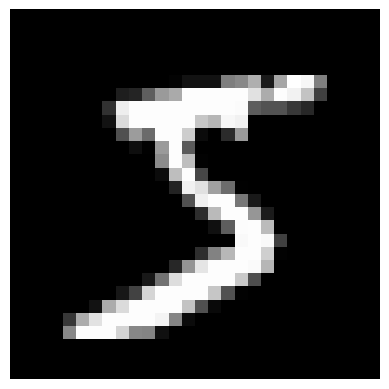

In [3]:
batch, _ = next(iter(trainloader_shifted))
image = batch[0].squeeze().numpy()
image = np.stack([image]*3, axis=-1)

fig, ax = plt.subplots()
ax.set_axis_off()
plt.imshow(image)
plt.show()

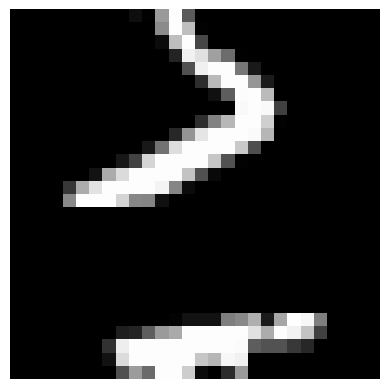

In [4]:
shift_transform = v2.Compose([
    DonutShift(),
])
shifted_image = shift_transform(batch)[0].squeeze().numpy()
shifted_image = np.stack([shifted_image]*3, axis=-1)

fig, ax = plt.subplots()
ax.set_axis_off()
plt.imshow(shifted_image)
plt.show()

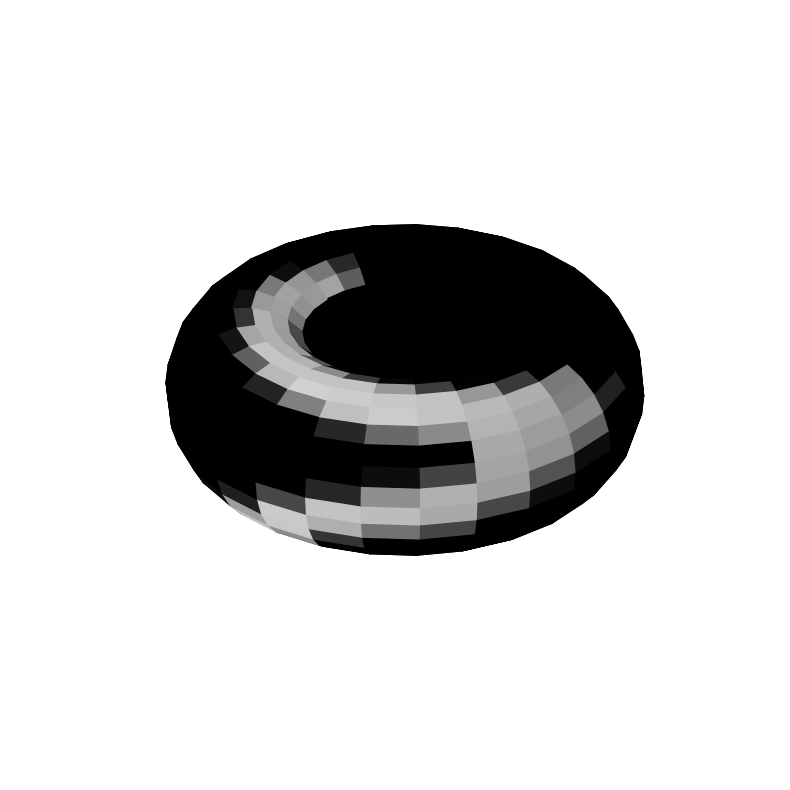

In [5]:
R = 2
r = 1

theta = np.linspace(0, 2 * np.pi, image.shape[1]) + 0.5*np.pi
phi = np.linspace(0, 2 * np.pi, image.shape[0]) + 0.9*np.pi
theta, phi = np.meshgrid(theta, phi)

x = (R + r * np.cos(phi)) * np.cos(theta)
y = (R + r * np.cos(phi)) * np.sin(theta)
z = r * np.sin(phi)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, facecolors=image)
ax.set_axis_off()
ax.set_box_aspect([1, 1, 1/3])

plt.show()

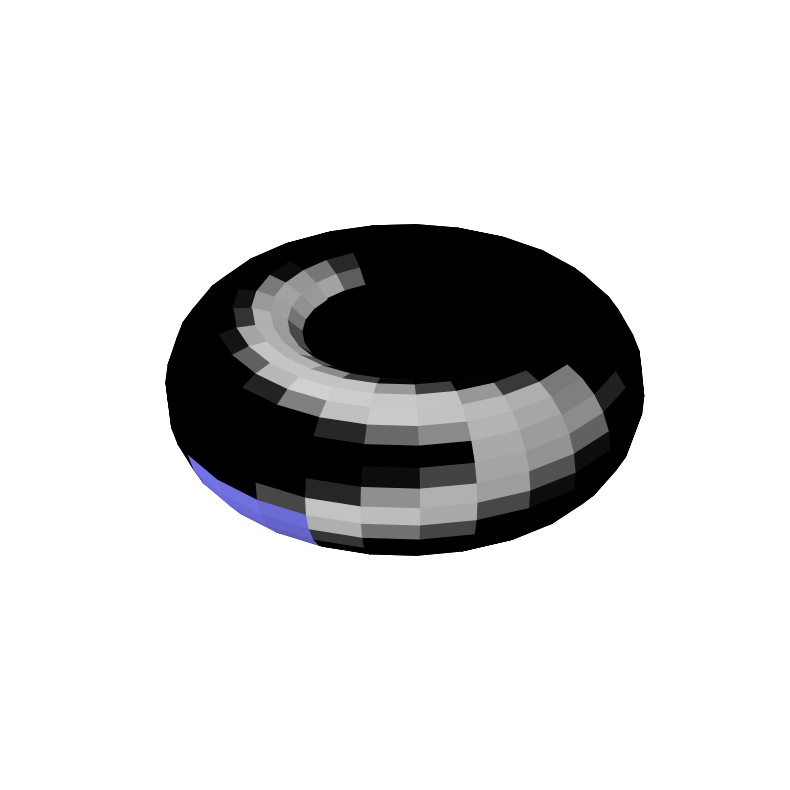

In [6]:
def get_frame(ax, i, j, image, kernel_size):
    image = np.copy(image)
    image[i:i+kernel_size, j:j+kernel_size, :] = np.stack([
        0.5 * np.ones((kernel_size, kernel_size)), 
        0.5* np.ones((kernel_size, kernel_size)), 
        np.ones((kernel_size, kernel_size))
        ], axis=-1)

    ax.clear()
    ax.plot_surface(x, y, z, facecolors=image)
    ax.set_axis_off()
    ax.set_box_aspect([1, 1, 1/3])
    return ax

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

kernel_size = 3
n_steps = (image.shape[0] // kernel_size) * (image.shape[1] // kernel_size)

def update(frame):
    i = (frame // (image.shape[0] // kernel_size) * kernel_size + 11) % (image.shape[0] - kernel_size)
    j = (frame % (image.shape[1] // kernel_size) * kernel_size + 11) % (image.shape[1] - kernel_size)
    return get_frame(ax, i, j, image, kernel_size)

ani = animation.FuncAnimation(fig, update, frames=n_steps, interval=20)
writer = animation.PillowWriter()
ani.save(f'../images/convolution.gif', writer=writer)